In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 22.3, 21.8, 21.2, 20.9, 20.1]
fvalues = [ x*9/5 + 32 for x in cvalues] 
print(fvalues)

C = np.array(cvalues)
print(C * 9 / 5 + 32)

[68.18, 69.44, 71.42, 72.5, 72.86, 72.14, 71.24000000000001, 70.16, 69.62, 68.18]
[68.18 69.44 71.42 72.5  72.86 72.14 71.24 70.16 69.62 68.18]


In [7]:
grades = [[79, 95, 60],
 [95, 60, 61],
 [99, 67, 84],
 [76, 76, 97],
 [91, 84, 98],
 [70, 69, 96],
 [88, 65, 76],
 [67, 73, 80],
 [82, 89, 61],
 [94, 67, 88]]
gArray = np.array(grades)
print(type(gArray), gArray.ndim, gArray.shape, gArray.dtype)

<class 'numpy.ndarray'> 2 (10, 3) int64


In [8]:
x = np.arange(10.4)
print(x)
y = np.arange(0.5, 10.4, 0.8)
print(y)
z = np.arange(0.5, 10.4, 0.8, int)
print(z)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.5  1.3  2.1  2.9  3.7  4.5  5.3  6.1  6.9  7.7  8.5  9.3 10.1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [9]:
# 50 values between 1 and 10:
print(np.linspace(1, 10))
# 7 phần tử cách đều nhau
print(np.linspace(1, 10, 7))
# không bao gồm điểm cuối:
print(np.linspace(1, 10, 7, endpoint=False))

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[ 1.   2.5  4.   5.5  7.   8.5 10. ]
[1.         2.28571429 3.57142857 4.85714286 6.14285714 7.42857143
 8.71428571]


In [10]:
a = np.random.rand(1000000,1)
%timeit a**2
%timeit [a[i]**2 for i in range(1000000)]

1.73 ms ± 95.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.62 s ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Một vài phép tính với vector
### Góc giữa các vector
Dot product giữa 2 vectors chia cho tích của norm của chúng
$$ cos(\theta) = \frac{\overrightarrow{x}\overrightarrow{y}}{\|\overrightarrow{x}\|\|\overrightarrow{y}\|} $$
Tính thử với v = [1, 4, 5] và u = [2 1 5]

In [3]:
def angle_between(v1, v2):
    dot_pr = v1.dot(v2)
    norms = np.linalg.norm(v1) * np.linalg.norm(v2)
    return np.rad2deg(np.arccos(dot_pr/norms))

v = np.array([1, 4, 5])
u = np.array([2, 1, 5])
print(angle_between(v, u))

29.152519407030084


In [ ]:
# tính điểm trung bình các kỳ kiểm tra
gArray.dot([0.3, 0.3, 0.4]) 

In [13]:
# nâng điểm
scaling = [1.1, 1.05, 1.03]
np.diag(scaling)
gArray.dot(np.diag(scaling))

array([[ 86.9 ,  99.75,  61.8 ],
       [104.5 ,  63.  ,  62.83],
       [108.9 ,  70.35,  86.52],
       [ 83.6 ,  79.8 ,  99.91],
       [100.1 ,  88.2 , 100.94],
       [ 77.  ,  72.45,  98.88],
       [ 96.8 ,  68.25,  78.28],
       [ 73.7 ,  76.65,  82.4 ],
       [ 90.2 ,  93.45,  62.83],
       [103.4 ,  70.35,  90.64]])

In [14]:
# % điểm mỗi bài thi so với điểm cao nhất (curving)
gArray.max(axis=0)
maxInExam = gArray.max(axis=0)
gArray.dot(np.diag(100/maxInExam)).round()

array([[ 80., 100.,  61.],
       [ 96.,  63.,  62.],
       [100.,  71.,  86.],
       [ 77.,  80.,  99.],
       [ 92.,  88., 100.],
       [ 71.,  73.,  98.],
       [ 89.,  68.,  78.],
       [ 68.,  77.,  82.],
       [ 83.,  94.,  62.],
       [ 95.,  71.,  90.]])

## Linear Regression (xấp xỉ tuyến tính)
Giả thiết một mối quan hệ tuyến tính giữa biến đầu vào (**X**) và đầu ra (**y**).
Mỗi biến đầu vào được gán cho một hệ số (coefficient) Beta (**β**), một hệ số tự do nữa được thêm vào cho phép đường thẳng di chuyển lên xuống được gọi là intercept hay **bias coefficient**
Hàm xấp xỉ tuyến tính đơn giản được viết: $$y = \beta_0 + \beta_1 x$$
"Học" linear regression chính là **ước tính giá trị của các hệ số của phương trình trên với dữ liệu mà ta có**.
### Các giả định của Linear Regression
1. Mối quan hệ giữa các biến số là tuyến tính
2. Dữ liệu không bị nhiễu (noise). Ta phải lọc các trường hợp ngoại lệ (outliers) tối đa có thể
3. Mô hình sẽ bị overfit khi các biến đầu vào tương quan nhiều với nhau 
4. Cho kết quả tốt hơn nếu các biến đầu vào tuân theo phân phối chuẩn (normal distribution). Nếu không, ta nên dùng các phép biến (transformation) để "nắn" dữ liệu chuẩn hơn
5. Nên đưa về quãng [0, 1] để có ước tính tốt hơn


### Công thức tính Beta Coefficient
Thực tế không cần học mà có thể tính trực tiếp theo công thức
$$ \beta_1 = \frac{\sum_{i=1}^{n} (x_i - mean(x)) * (y_i - mean(y))}{\sum_{i=1}^{n}(x_i - mean(x))^2} $$

$$ \beta_0 = mean(y) - \beta_1 * mean(x)$$

In [5]:
# tự tạo dữ liệu với 300 điểm
x = np.arange(1,301)
y = np.random.normal(x + 2, 50)

[ -63.0748098   -38.23161692   89.36559835   30.57413808   -9.64727636
   28.98295312   42.3864644    -6.73668868   49.2594038    37.74086985
  -10.71646104   22.58362704   51.83729059   53.38735708   43.10383794
   26.60770169   38.00452415   90.66581234   39.50089059   14.83466664
  -31.37849014  -19.84704383   42.96995589  -66.54189856  -67.4867447
   18.76403629   56.91421286   12.54250254  -25.54535777   30.51097427
  -15.71869668 -110.99889497   33.72241952   12.90771178  -23.12533316
   57.4743769    61.74620986   41.41900078   -7.90586981  -16.95156459
   51.32039085  112.95198554   41.5119395     1.52369075   15.64107316
   41.7865149    15.34414607  -28.73051957  -25.62972634   61.17631608
   93.39207796   20.86627229  109.67914113   66.23750842   56.35403252
   43.51698325   71.28669354   17.21025869  -13.08817712    2.05952325
    1.35926235   82.93033561   13.87527273  101.93757059  100.52438996
   86.97608361  152.15786202   90.63339406   48.11368659  126.38317643
   49.3

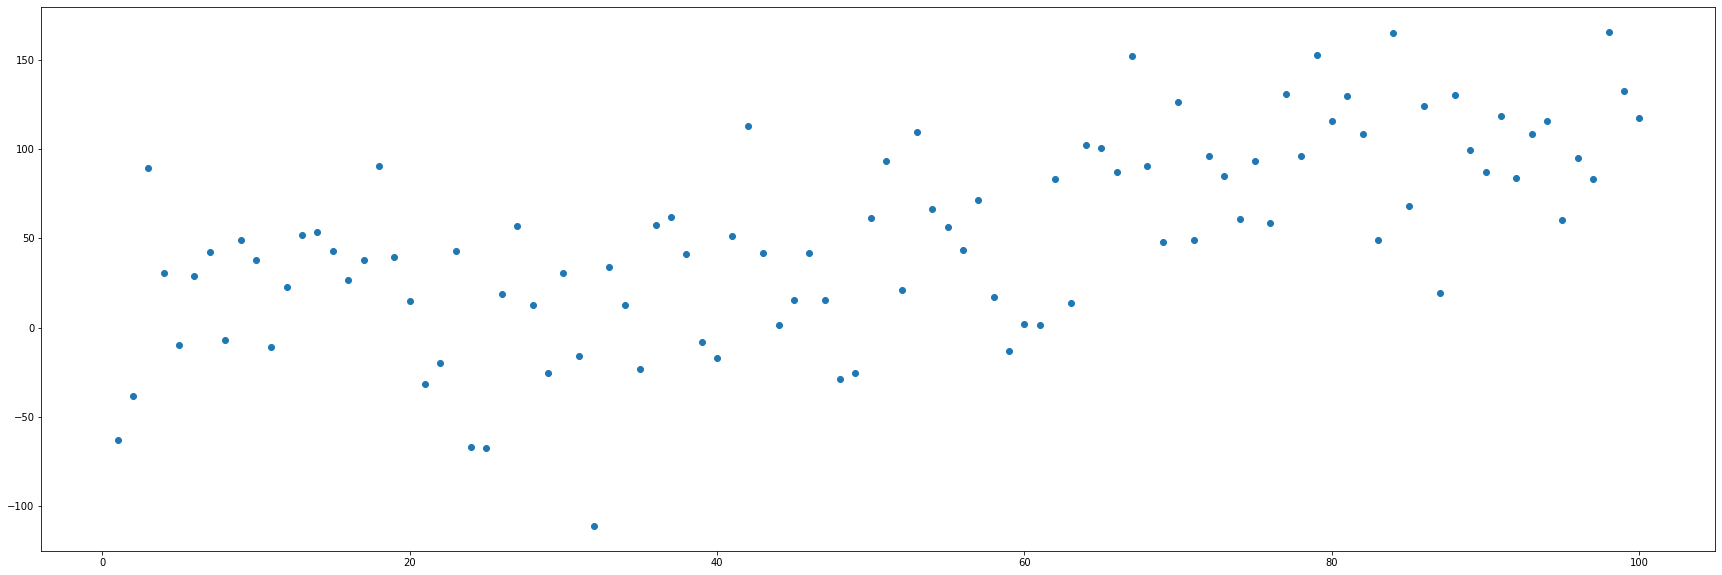

In [8]:
plt.figure(figsize=(30,10))
plt.scatter(x[:100], y[:100])
plt.show()

In [7]:
beta1 = sum((x - np.mean(x))*(y-np.mean(y)))
beta1 = beta1 / sum((x - np.mean(x))**2)

beta0 = np.mean(y) - beta1 * np.mean(x)
print(beta0, beta1)

2.1643799335385836 1.0008259472474053


In [8]:
def pred(x):
    return beta0 + beta1*x
y_preds = pred(x)
y_preds[:10]

array([ 3.16520588,  4.16603183,  5.16685778,  6.16768372,  7.16850967,
        8.16933562,  9.17016156, 10.17098751, 11.17181346, 12.17263941])

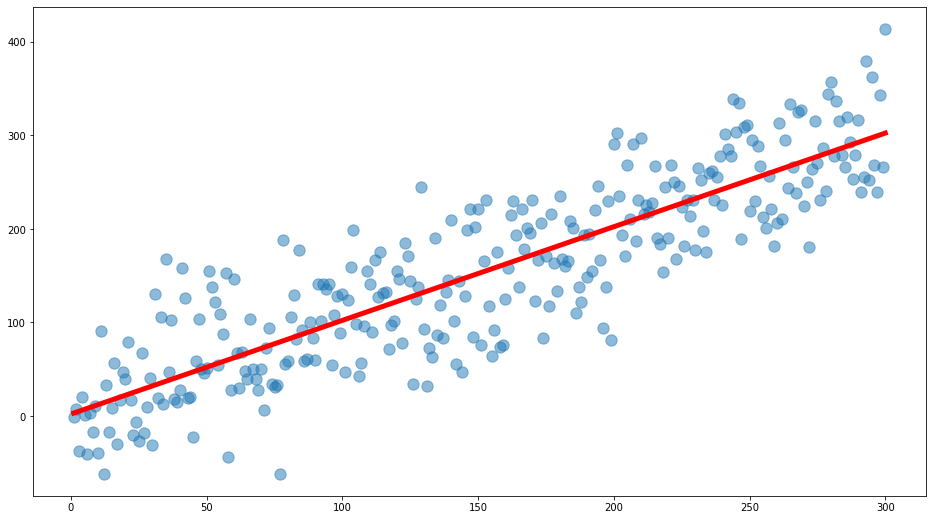

In [13]:
plt.figure(figsize=(16,9))
plt.scatter(x,y, s=128, alpha=0.5, label='Y')
plt.plot(np.arange(1,301), y_preds, color='red', linewidth=5, label='Linear Predicted Y')
plt.show()

### Cách khác đơn giản hơn
Đối với $\beta_1$ ta có công thức khác đơn giản hơn
$$ \beta_1 = corr(x,y) * \frac{stdev(y)}{stdev(x)}$$

In [16]:
b1 = np.corrcoef(x,y)[0][1] * (np.std(y) / np.std(x))
b0 = np.mean(y) - b1 * np.mean(x)
print(b0, b1)
# lưu ý corrcoef trả về ma trận 2x2

2.1643799335386404 1.0008259472474048


## Chấm điểm model
Có nhiều cách để đánh giá mô hình xấp xỉ này, chúng ta sẽ dùng Root Mean Squared Error, được tính như sau:
$$ RMSE = \sqrt{\frac{\sum_{i=1}^{n}(p_i - y_i)^2}{n}} $$ với $p_i$ là giá trị dự đoán

In [ ]:
def get_rmse(y_pred, y):
    return